In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports

import logging
import torch

from PIL import Image
from torchvision import models as M
from torchvision.io import read_video
from torchvision.transforms import transforms as T
from torchvision.transforms import functional as fn

from LoopClosureDL import LoopClosureDL
import matplotlib.pyplot as plt
from matplotlib import cm as cm

logging.basicConfig()
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)


In [3]:
frames, _, _ = read_video(str("imgs/city_actual_short.mp4"), output_format="TCHW")
print(type(frames))
print(frames.shape)

frames = frames.float() / 255


transform = T.Compose([
   T.Resize(240),
   T.CenterCrop(224),
   T.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
   )
])


data = transform(frames[range(0, frames.shape[0], 10)])
print(data.shape)
print(torch.max(data))
print(torch.min(data))

/Users/ronitarora/Documents/Ronit Arora - Georgia Tech General/Georgia Tech Courses/ Fall 2022 Semester Georgia Tech/VIP Fall 2022/Loop Closure Project/vip-venv/lib/python3.8/site-packages/torchvision/io/video.py:162: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


<class 'torch.Tensor'>
torch.Size([849, 3, 720, 1280])
torch.Size([85, 3, 224, 224])
tensor(2.6400)
tensor(-2.1179)


In [4]:
dl = LoopClosureDL()
# Not sure why I had to manuallly intervene here
dl.vector_length = 23
print(dl.vector_length)


23


In [5]:
dl.compute_hook_activation(data)
dl.post_processing()
sim = dl.produce_similarity()
print(sim)

torch.Size([85, 512])
tensor([[0.0797, 0.0000, 0.0265,  ..., 0.0000, 0.1910, 0.0000],
        [0.5552, 2.5809, 1.1162,  ..., 1.8724, 0.2497, 1.2448],
        [0.7870, 2.9336, 0.8424,  ..., 0.8642, 0.6254, 1.8757],
        ...,
        [0.4994, 3.7439, 1.3053,  ..., 0.4778, 0.1244, 0.6570],
        [0.7954, 3.4042, 1.4372,  ..., 1.4305, 0.1120, 0.3747],
        [1.1653, 4.4383, 1.4269,  ..., 1.7695, 0.0554, 0.1920]])
tensor([[-0.0437,  0.1629,  0.2214,  ..., -0.1240,  0.0475,  0.0157],
        [ 0.0444, -0.0600,  0.0433,  ...,  0.1034,  0.0717, -0.0733],
        [ 0.0840, -0.1058,  0.0035,  ...,  0.1351,  0.0796, -0.1636],
        ...,
        [ 0.0822, -0.0350,  0.0061,  ..., -0.0305, -0.0101, -0.0173],
        [ 0.0794, -0.0230, -0.0086,  ..., -0.0615, -0.0393,  0.0433],
        [ 0.0842, -0.0210, -0.0432,  ...,  0.0302, -0.0931,  0.0570]])
tensor([[1.0000, 0.3057, 0.0000,  ..., 0.0000, 0.0021, 0.0000],
        [0.3057, 1.0000, 0.7557,  ..., 0.1470, 0.0000, 0.1125],
        [0.0000, 0

In [6]:
# temp = sim.numpy()
# img = Image.fromarray(temp,'RGB')
# img.save('my.png')
# img.show()  



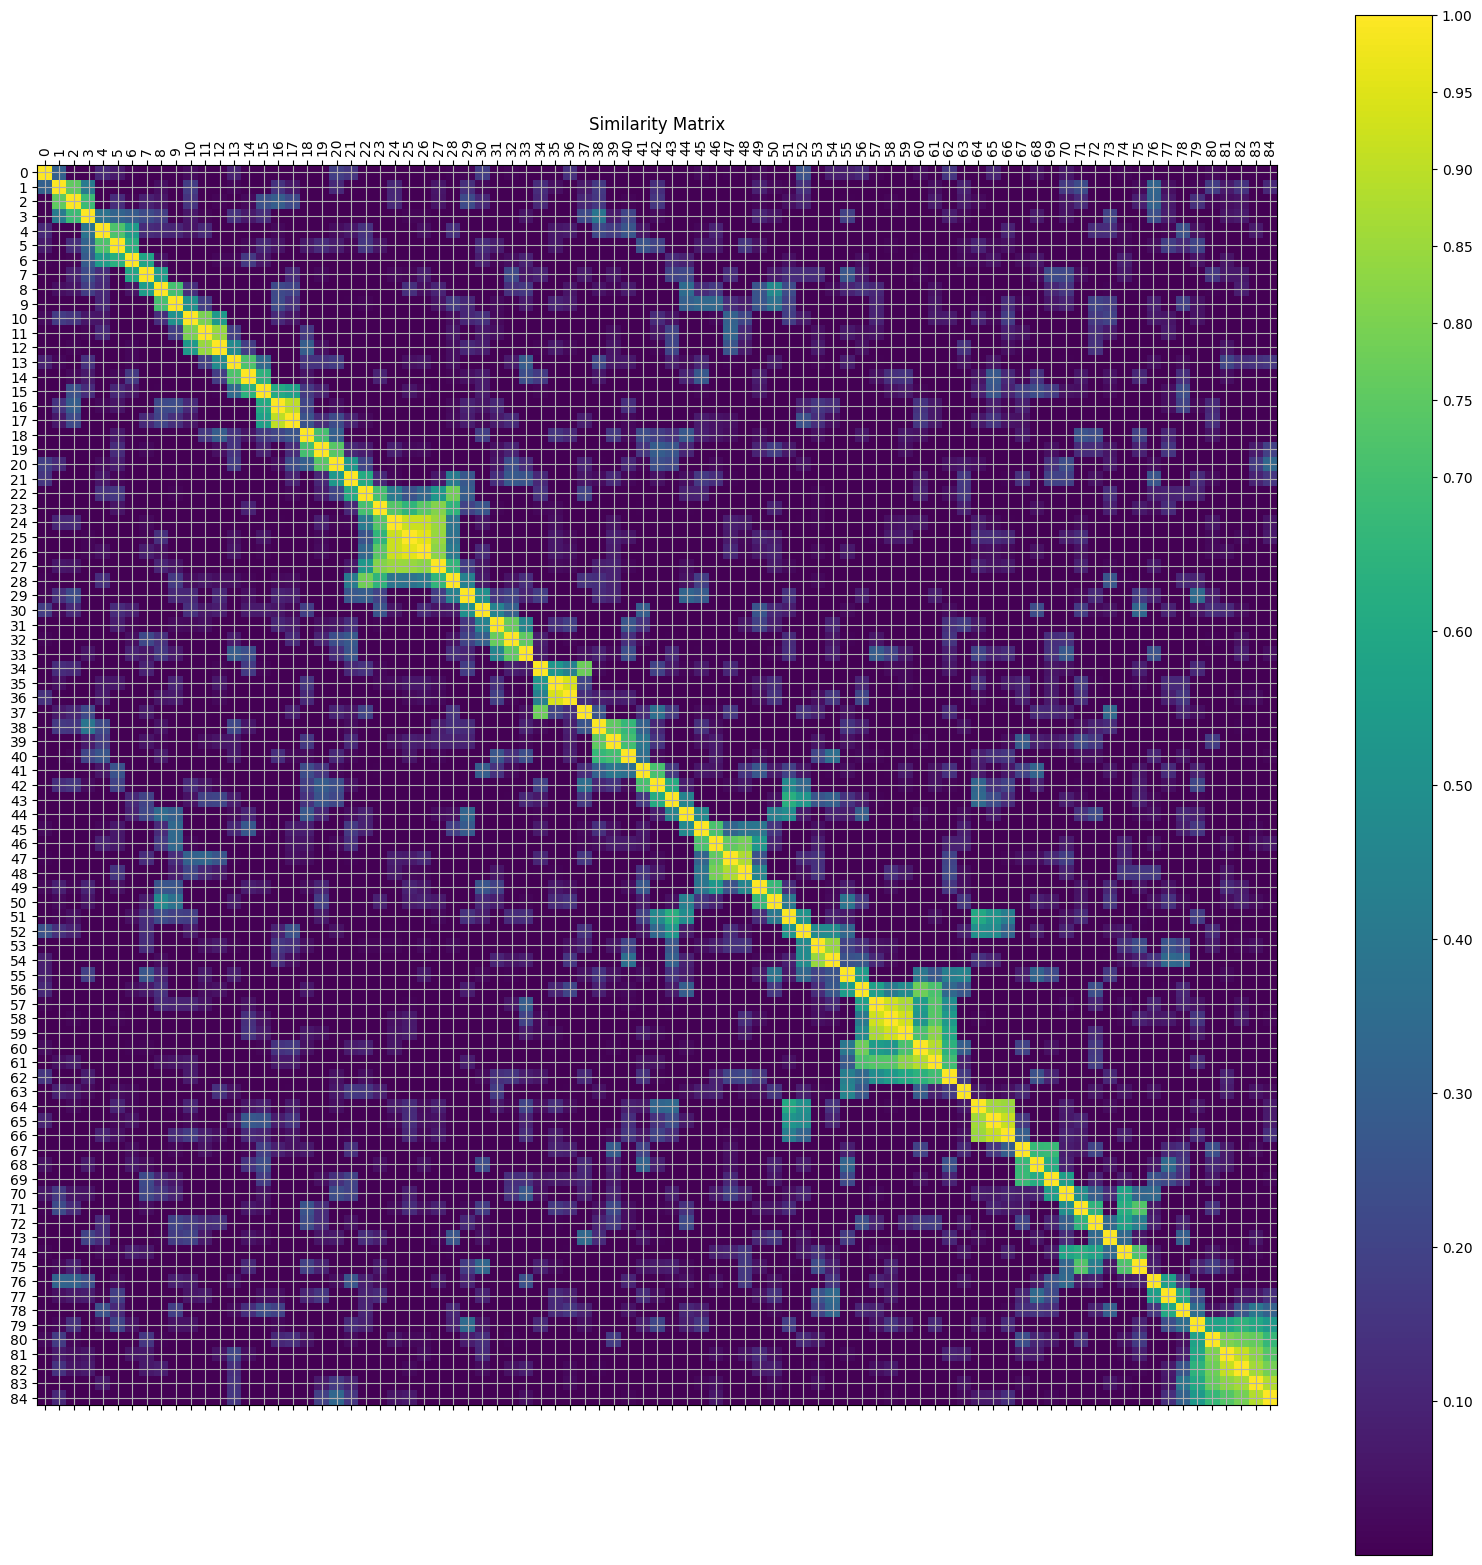

: 

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(sim, interpolation='nearest')
ax.grid(True)
plt.title('Similarity Matrix')
plt.xticks(range(len(sim)), rotation=90);
plt.yticks(range(len(sim)));
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()